# BoomBikes - Bikesharing:
### Probem statement:

BoomBikes is a provider for Bike-sharing in US, wants to predict and understand the demand for shared bikes among the people after COVID-19 pandemic, to improve revenue based on factors which affecting demand for shared bikes in American market.
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
### Business Goal:
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Steps:
  (1) Data loading.<br>
  (2) Data cleaning.<br>
  (3) Data analysis and manipulations.<br>
  (4) Data split in Train,test.<br>
  (5) Scalliing train data.<br>
  (6) Feature selection<br>
  (7) Model training.<br>
  (8) Analyzing model parameters.<br>
  (9) Analizing assumptions.<br>
  (10) Scalling test dataset.<br>
  (11) Prediction on test set.<br>
  (12) Analyzing predictions.<br>

In [1]:
# Importing nessasary python libraries
# importing basic libraries for data reading and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Importing libraries for model devolopment
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data loading:

In [2]:
df_sharing = pd.read_csv("day.csv")
df_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df_sharing.shape

(730, 16)

As per input data we can observe following points:
 - There are 730 entries or data points from input provided
 - Data has 16 inital columns inclusing independent and dependent target variable.
 - There is one catagorical varible from initial data named 'dteday'

## Data cleaning:

As per observation from initial data there are no null/missing values present in data also the data is well organized with single header.
But there is one columned <b>'instant'</b> indicates record index which is not required for <b>model devolopment</b> and analysis so we can remove this column

Also the columns <b>casual</b> and <b>registered</b> are number of bookings happend from causual and refistered users and as per data dictionary sum of these 2 variables results in <b>'cnt'</b> target variable. So we can drop these columns.

In [6]:
df_sharing = df_sharing.drop('instant', axis=1)
df_sharing = df_sharing.drop('registered', axis=1)
df_sharing = df_sharing.drop('casual', axis=1)
df_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Data analysis and manipulations:
### univariate analysis on catagorical variables

### dteday:
This column represents date when bike-sharing booking happend.
here we can create a new column with <b>day</b> for analysis. Month and year information has already present in columns 'mnth' and 'yr' so we are not going to create new columns for those attributes here. 

In [7]:
df_sharing['day'] = pd.to_datetime(df_sharing['dteday'], format="%d-%m-%Y").dt.day
df_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


Now we can drop <b>dteday</b> column because not we have date information in remaining columns. 

In [8]:
df_sharing = df_sharing.drop('dteday', axis=1)
df_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


also we can check is there any relation between attribute day and target variable.

<Axes: title={'center': 'Bookings vs day of month'}, xlabel='day', ylabel='yr'>

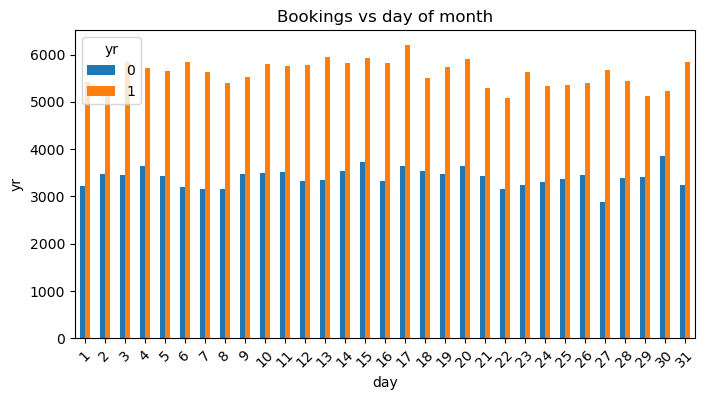

In [9]:
pt_day = pd.pivot_table(df_sharing, values='cnt', index='day', columns='yr', aggfunc='mean')
pt_day.plot(kind='bar', figsize=(8, 4), rot=45,  ylabel='yr', title="Bookings vs day of month")

There is no significant change or correlation observed between day of booking and number of bookings so we can drop 'day' column from out analysis.

In [10]:
df_sharing = df_sharing.drop('day', axis=1)
df_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### season:
This column represents season information in catagorical data with 4 types. As per data dictionary these column values represents following information.
 1:spring<br>
 2:summer<br>
 3:fall<br>
 4:winter<br>
First we will visualize these in <b>bar</b> chart and analyze.

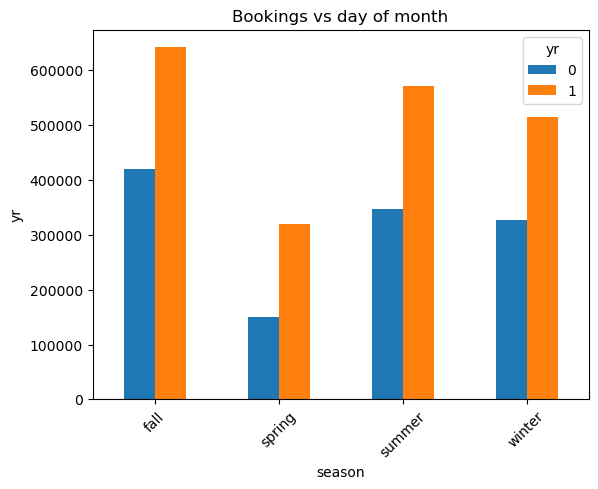

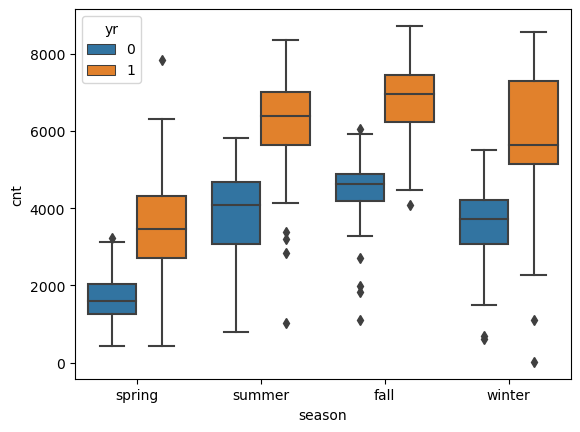

In [11]:
df_sharing.season = df_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
pt_season = pd.pivot_table(df_sharing, values='cnt', index='season', columns='yr', aggfunc='sum')
pt_season.plot(kind='bar', rot=45,  ylabel='yr', title="Bookings vs day of month")
plt.show()
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = df_sharing)
plt.show()

As per above distribution plot we can observe that there is a clear correlation between attribute <b>season</b> and target variable <b>cnt</b> during years 2018(0) and 2019(1).
Higher number of bookings happend in 'fall' and 'summer' 
<b>season</b> is not a <b>ordered</b> catagorical variable and each season is independent of other. So we can make new numerical <b>dummy Variables</b> from <b>season</b> column for model devolopment as follows.


In [12]:
season_dummy = pd.get_dummies(df_sharing['season'], drop_first = True)
season_dummy = season_dummy.astype(int)
df_sharing = pd.concat([df_sharing, season_dummy], axis = 1)
# now drop 'season' column from data
df_sharing = df_sharing.drop('season', axis=1)
df_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### yr:

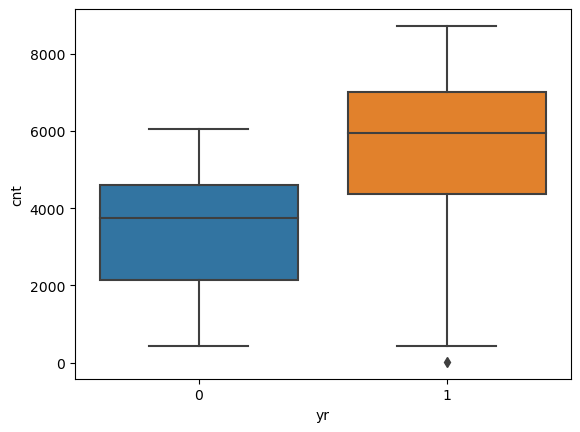

In [13]:
sns.boxplot(x = 'yr', y = 'cnt', data = df_sharing)
plt.show()

From the above distribution plot we can clearly observe that there is a significant improvement in bookings in 2019(1) compared with 2018(0). But this column represents year value for new we will keep this column for our analysis.

### mnth:
This column represents month of the year when booking happend.

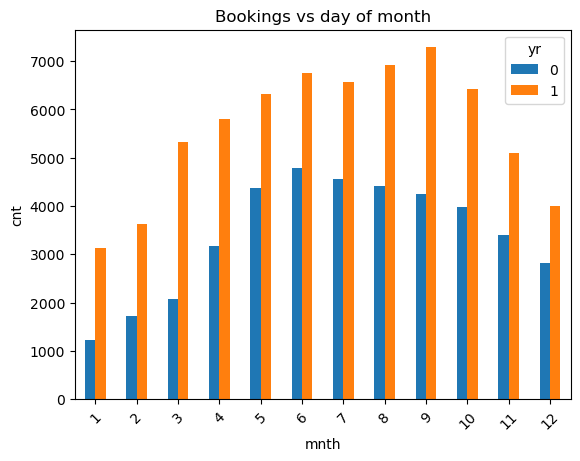

In [14]:
pt_month = pd.pivot_table(df_sharing, values='cnt', index='mnth', columns='yr', aggfunc='mean')
pt_month.plot(kind='bar', rot=45,  ylabel='cnt', title="Bookings vs day of month")
plt.show()

From the above plot, most number of bookings are happend in September-2019 and June-2018 , and there is significant relation between month of the year and bookings. Also we can make one derived metric from month column as <b>quarter</b> of the year for analysis.

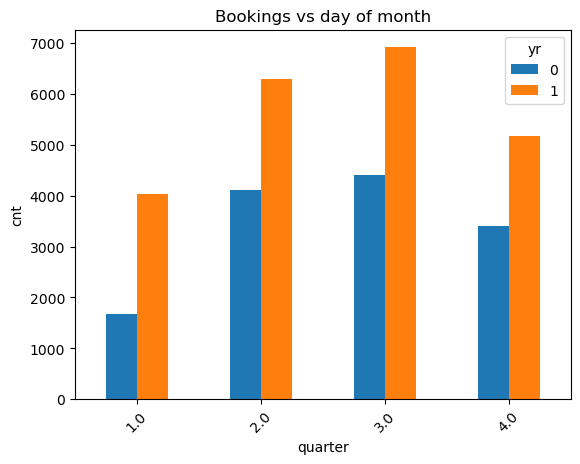

In [15]:
df_sharing['quarter'] = df_sharing.mnth.apply(lambda x:np.ceil(x/3))
pt_month = pd.pivot_table(df_sharing, values='cnt', index='quarter', columns='yr', aggfunc='mean')
pt_month.plot(kind='bar', rot=45,  ylabel='cnt', title="Bookings vs day of month")
plt.show()

### holiday:
This column represents whether booking is on holiday(1) or not(0)

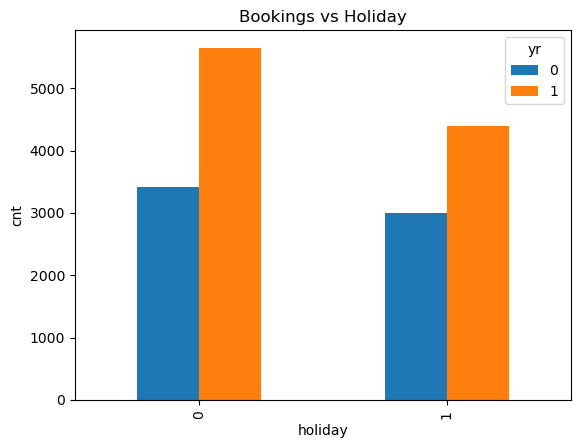

In [16]:
pt_month = pd.pivot_table(df_sharing, values='cnt', index='holiday', columns='yr', aggfunc='mean')
pt_month.plot(kind='bar',  ylabel='cnt', title="Bookings vs Holiday")
plt.show()

From the abobe plot we can observ that most of the bookings happend in working day. So Bike-sharing might be mostly used by employees.

### weekday:
This column represents day of the week when booking happend.

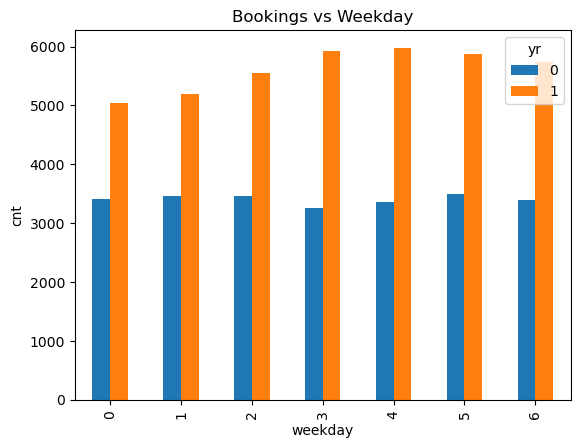

In [17]:
pt_weekday = pd.pivot_table(df_sharing, values='cnt', index='weekday', columns='yr', aggfunc='mean')
pt_weekday.plot(kind='bar',  ylabel='cnt', title="Bookings vs Weekday")
plt.show()

The variable 'weekday' shows that 
 - Target varibale 'cnt' in increasing from day 0 to 4 and decreasing from day-4 to day-6 in year 2019.
 - Target varibale 'cnt' in consistant in day-0, day-1, day-2, day-5, day-6, decreasing in  day-3, day-4 in year 2018.

### workingday:
This column describes if day is neither weekend nor holiday is 1, otherwise is 0.

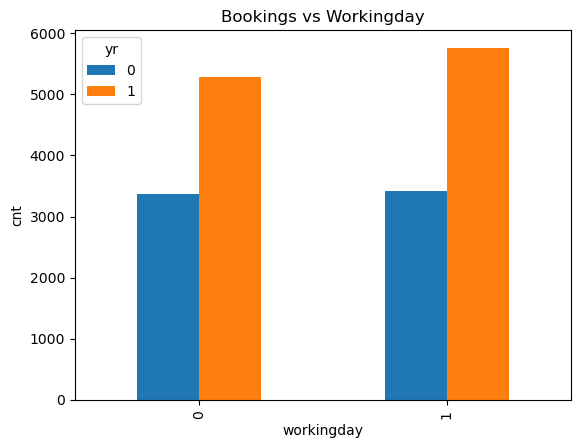

In [18]:
pt_workingday = pd.pivot_table(df_sharing, values='cnt', index='workingday', columns='yr', aggfunc='mean')
pt_workingday.plot(kind='bar',  ylabel='cnt', title="Bookings vs Workingday")
plt.show()

From the above plot we can observe that there is a increase in bookings on working day compared to non-workingday.

### weathersit:
As per data dictionary this column represents weather condition as follows.<br>
 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
 
The weather conditions labelled with each catagory are indipendent in nature, so we sould make <b>dummy varibales</b> from each weather condition from above list as follows.
But there is no value of <b>weathersit==4</b> so we can skip this catagory from list.

In [19]:
set(df_sharing['weathersit'])

{1, 2, 3}

In [20]:
# list all unique weather states.
weather_state = {1: ['Clear', 'Few clouds', 'Partly cloudy'],
                 2: [ 'Cloudy', 'Mist' , 'Broken clouds', 'Few clouds'],
                 3: ['Light Snow','Thunderstorm','Scattered clouds', 'Light Rain'],
                 #4: ['Heavy Rain' ,'Ice Pallets' , 'Thunderstorm' , 'Mist', 'Snow', 'Fog'] # No value ==4 so skipping
                }

# Now make unique weather list
weather_list = list(set(weather_state[1]+weather_state[2]+weather_state[3]))
weather_list


['Partly cloudy',
 'Scattered clouds',
 'Light Rain',
 'Mist',
 'Clear',
 'Thunderstorm',
 'Cloudy',
 'Light Snow',
 'Few clouds',
 'Broken clouds']

create new columns with weather list in data (df_sharing) and set all weather state based on given 'weathersit' variable. 
And <b>drop 'weathersit'</b> variable from data/

In [21]:
def set_weather(x):
    x[weather_state[x.weathersit]] = 1
    return x
df_sharing[weather_list] = 0
df_sharing = df_sharing.apply(lambda x: set_weather(x), axis=1)
df_sharing = df_sharing.drop('weathersit', axis=1)
df_sharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,Partly cloudy,Scattered clouds,Light Rain,Mist,Clear,Thunderstorm,Cloudy,Light Snow,Few clouds,Broken clouds
0,0.0,1.0,0.0,6.0,0.0,14.110847,18.18125,80.5833,10.749882,985.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,14.902598,17.68695,69.6087,16.652113,801.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,2.0,1.0,8.200000,10.60610,59.0435,10.739832,1562.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,3.0,1.0,9.305237,11.46350,43.6957,12.522300,1600.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
plt.figure(figsize=(20, 12))
for idx in range(0,len(weather_list)):
    plt.subplot(2,5,idx+1)
    sns.boxplot(x = weather_list[idx], y = 'cnt',hue='yr', data = df_sharing)
    
plt.show()

From the above plot we can observe that more number of the bookings happend when<br>
 - No-mist weather<br>
 - Clear weatrher<br>
 - No Broken clouds<br>
 - No light snow<br>
 - No scatter clouds<br>
 - Not cloudy<br>
 - No Thunderstrom<br>
 - No light rain<br>
 - Partly cloudy<br>
 - Few cloud<br>


### Univariate analysis on continuas variables:
There are 4 continuas variables as follows.<br>
- temp : temperature in Celsius<br>
- atemp: feeling temperature in Celsius<br>
- hum: humidity<br>
- windspeed: wind speed<br>
To analyze these data we can use pairplot with target variable as follows

#### Dew Point Temperature:
From the columns 'temp' and 'hum' we can make new derived metric named dew point, is the temperature the air needs to be cooled to in order to achieve a relative humidity (RH) of 100%. At this point the air cannot hold more water in the gas form. At a dew point temperature above 21C the body starts to experience discomfort.

Ingeneral hummidity ranges from 45 and 55 and can be high as 80% in some regions. But there is a one value from data observed that hummidity ==0.0 at <b>index 68. so we can drop this row</b>.

In [ ]:
def get_dew_point_c(temp_c, humidity):
    # Compute the dew point in degrees Celsius
    alpha = ((17.27 * temp_c) / (237.7 + temp_c)) + math.log(humidity/100.0)
    return (237.7 * alpha) / (17.27 - alpha)
# Drop row where hummidity==0
df_sharing = df_sharing[df_sharing.hum > 0.0]

df_sharing['dpt'] = df_sharing.apply(lambda x: get_dew_point_c(x['temp'], x['hum']), axis=1)
df_sharing.head()

#### Wind Chill Index:
Another data driven metric from temperature and windspeed is Wind Chill Temperature(WCT). but these variable is as same as <b>atemp</b> feeling temperature in Celsius.

In [ ]:
sns.pairplot(df_sharing[['cnt', 'dpt','temp','atemp', 'hum','windspeed']])
plt.show()

<b>Observations from continuas variables</b><br>
 - There is a significant correlation between temperature and target variable.<br>
 - There is not much correlation between humidity and target variable.<br>
 - There is not much correlation between windspeed and target variable.<br>

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_sharing[['cnt','dpt','temp','atemp', 'hum','windspeed','spring','summer','winter','yr','mnth', 'holiday','weekday', 'workingday' ]].corr(), annot = True, cmap="YlGnBu")

## Data split train-test:
Up to now we have analyzed and filtered input data for understaning the relation between independent variables and target variavle. Now we can proceed for data seperation for training and testing model. as follows.

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(df_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scalliing train data.
After splitting data to training and test sets, next step is to re-scale available data to normalize model output. Here we are using min-max scalling for out model devolopment as follows.

In [ ]:
df_sharing.columns

In [ ]:
scaler = MinMaxScaler()
variables_scalling = df_sharing.columns#['mnth','temp', 'weekday','atemp', 'hum', 'windspeed', 'cnt', 'quarter', 'dpt']
df_train[variables_scalling] = scaler.fit_transform(df_train[variables_scalling])
df_train[variables_scalling].describe()

In [ ]:
# Let's check the correlation to see which variables are highly correlated with target variable
plt.figure(figsize = (4, 8))
sns.heatmap(df_train.corr().loc[:,['cnt']], annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building
Next step is to seperate target variable and independent predictor variables as follows.

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

## Feature selection:

After preparation of input and output variables we need to select features to train the model.
To do feature selection first we use automatic feature selection algorithm named <b>Recursive feature elimination</b> as follows.

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
selected_features_rfe = X_train.columns[rfe.support_]
selected_features_rfe

Outof 24 input features RFE has given rank 1 to 12 features. SO we will start model building using these selected features.

##  Model training:

In [ ]:
# Function to compute Varience inflation factor
def compute_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# Function to process Ordinary Least Squares regression and Variance Inflation Factor
def train_model(X_train, y_train):
    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_train)
    # Train model
    lm_bike_sharing = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
    # compute VIF for current X_train data
    vif = compute_vif(X_train)
    return lm_bike_sharing, vif

#### Building model-V1:

In [ ]:
lm_bike_sharing_v1, vif = train_model(X_train[selected_features_rfe], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v1.summary())
print(vif)

#### Dropping in-significant variable atemp:
As per model summery we can observe that the <b>P</b> value and <b>VIF</b> for independent variable <b>atemp</b> are high compared with required range.
So we can <b>drop 'atemp'</b> variable from the model devolopment and re-build model.

In [ ]:
selected_features_rfe_v2 = selected_features_rfe.drop('atemp')

#### Re-building model-V2:

In [ ]:
lm_bike_sharing_v2, vif = train_model(X_train[selected_features_rfe_v2], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v2.summary())
print(vif)

#### Dropping in-significant variable dpt:
As per model summery we can observe that the significance value <b>P</b> is high for <b>temp</b> but dropping 'temp' variable results in huge drop in R-squared value and as per initial analysis the variable 'temp' has significant correlation between target variable.
The <b>VIF</b> for independent variable <b>dpt</b> is high and this variable is derived from temp.
So we can <b>drop 'dpt'</b> variable from the model devolopment and re-build model.

In [ ]:
selected_features_rfe_v3 = selected_features_rfe_v2.drop('dpt')

#### Re-building model-V3:

In [ ]:
lm_bike_sharing_v3, vif = train_model(X_train[selected_features_rfe_v3], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v3.summary())
print(vif)

#### Dropping high VIF variable mnth:
As per VIF summery we can observe that the <b>VIF</b> value for independent variable <b>mnth</b> is high compared with maximum range(5 -> 80% varience explained by independent variable).
So we can <b>drop 'mnth'</b> variable from the model devolopment and re-build model.

In [ ]:
selected_features_rfe_v4 = selected_features_rfe_v3.drop('mnth')

#### Re-building model-V4:

In [ ]:
lm_bike_sharing_v4, vif = train_model(X_train[selected_features_rfe_v4], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v4.summary())
print(vif)

#### Dropping high VIF variable hum:
As per VIF summery we can observe that the <b>VIF</b> value for independent variable <b>temp</b> is high (>5 -> 80% varience explained by independent variable).
But the variable temperature has significant correlation with target variable.
So we will <b>drop 'hum'</b> variable from the model devolopment and re-build model.

In [ ]:
selected_features_rfe_v5 = selected_features_rfe_v4.drop('hum')

#### Re-building model-V5:

In [ ]:
lm_bike_sharing_v5, vif = train_model(X_train[selected_features_rfe_v5], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v5.summary())
print(vif)

#### Dropping high VIF variable quarter:
As per VIF summery we can observe that the <b>VIF</b> value for independent variable <b>quarter</b> is high compared with maximum range(5 -> 80% varience explained by independent variable).
So we can <b>drop 'quarter'</b> variable from the model devolopment and re-build model.

In [ ]:
selected_features_rfe_v6 = selected_features_rfe_v5.drop('quarter')

#### Re-building model-V6:

In [ ]:
lm_bike_sharing_v6, vif = train_model(X_train[selected_features_rfe_v6], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v6.summary())
print(vif)

#### Adding key variables from initial analysis:

As per ranking given by RFE algorithm model devolopment started with features selected with rank '1'. Now we are going to tune model with high ranking features from RFE algorithm.
Note that following features selected listed after multiple iterations.

In [ ]:
#X_train_rfe_v8 = pd.concat([X_train_rfe_v6, X_train[['weekday','Cloudy']]], axis = 1)
selected_features_rfe_v7 = selected_features_rfe_v6.append(pd.Index(['summer','weekday','Cloudy']))
lm_bike_sharing_v7, vif = train_model(X_train[selected_features_rfe_v7], y_train)
#Let's see the summary of our linear model
print(lm_bike_sharing_v7.summary())
print(vif)

## Residual Analysis of the train data:
After sucessfull model build the nest step is to analyze and observe assumptions and residuals as follows.
check if the error terms are normally distributed - major assumptions of linear regression

In [ ]:
# Assumption 1: error terms are narmally distributed
X_train_lm = sm.add_constant(X_train[selected_features_rfe_v7])
y_train_pred = lm_bike_sharing_v7.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)


In [ ]:
# Assumption 2: Sum of error terms equal to '0'
round((y_train - y_train_pred).sum(), 2)

In [ ]:
plt.figure(figsize=(15, 15))
selected_variables = ['temp','windspeed','weekday','yr','spring','summer','winter','Cloudy','holiday','Light Snow']
sns.scatterplot(data=X_train[selected_variables])
sns.lineplot(y_train_pred)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Data points VS y-pred")
plt.show()


## Scalling test dataset:

In [ ]:
scalled_features = df_sharing.columns
df_test[scalled_features] = scaler.transform(df_test[scalled_features])
df_test.describe()

#### Dividing into X_test and y_test:

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test[selected_features_rfe_v7]
X_test.head()

## Prediction on test set:

In [ ]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
# Making predictions
y_test_pred = lm_bike_sharing_v7.predict(X_test_lm)

In [ ]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=X_test)
sns.lineplot(y_test_pred)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Test Data points VS y-test-pred")
plt.show()

## Analyzing predictions:

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.scatterplot(pd.concat([y_test,y_test_pred],axis=1))
fig.suptitle('y_test vs y_test_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=6)                          # X-label
plt.ylabel('y_test_pred', fontsize=6)                          # Y-label

In [ ]:
print("R2 score on test data predictions: ", r2_score(y_test, y_test_pred))

### Residual analysis on test data predictions:

In [ ]:
# Assumption: checking error terms are narmally distributed
fig = plt.figure()
sns.distplot((y_test - y_test_pred))
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 6)

### Observations from test data predictions:
 - R2-Score of test data predictions is 0.81 and train data is 0.825. So from the R2-score we can conclude that model is appropriatly fitting the data.
 - Error terms of test data predictions are normally distributed so simple linear regression assumptions are satisfiled.
 -